Predicting diabetes can be useful for early detection and prevention of the disease. 

Global data:

- 537 million adults (20-79 years) are living with diabetes (1 in 10). This number is predicted to rise to 643 million by 2030 and 783 million by 2045.
- Over 3 in 4 adults with diabetes live in low- and middle-income countries.
- Diabetes is responsible for 6.7 million deaths in 2021 - 1 every 5 seconds.
- Diabetes caused at least USD 966 billion dollars in health expenditure – a 316% increase over the last 15 years.

Source:
International Diabetes Federation.
IDF Diabetes Atlas, 10th edn. Brussels,
Belgium: 2021. Available at: https://www.diabetesatlas.org

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#from sklearn.impute import SimpleImputer

In [2]:
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

Loading the dataset

In [3]:
dfDia = pd.read_csv(".\datasets\diabetes.csv")

Printing the last 10 values of the Dataframe.

In [4]:
dfDia.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (mg/dL)
- Blood Pressure: Diastolic blood pressure (mmHg)
- Skin Thickness: Triceps skin fold thickness. Used to estimate body fat, normal value in women is 23 mm. Higher thickness leads to obesity and chances of diabetes increases.
- Insulin: 2-Hour Serum Insulin (&mu;U/mL)
- BMI: Body Mass Index (kg/m&sup2;)
- Diabetes Pedigree Function: It is a score that represents the diabetes mellitus history in the relatives of an individual. The range of the DPF is from 0 to infinity, where higher values indicate a stronger family history of diabetes. However, in practice, the DPF is usually capped at a maximum value of 2.5 to prevent it from having an undue influence on the overall risk score for diabetes.
- Age: Age (years)
- Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

Printing general drescriptive statistics.

In [5]:
dfDia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are illogical values of zero in Glucose, BloodPressure, Skin Thickness, Insulin and BMI. They have to be missing values.

When representing on histograms it can be seeing clearly the values of zero. The other values make sense.

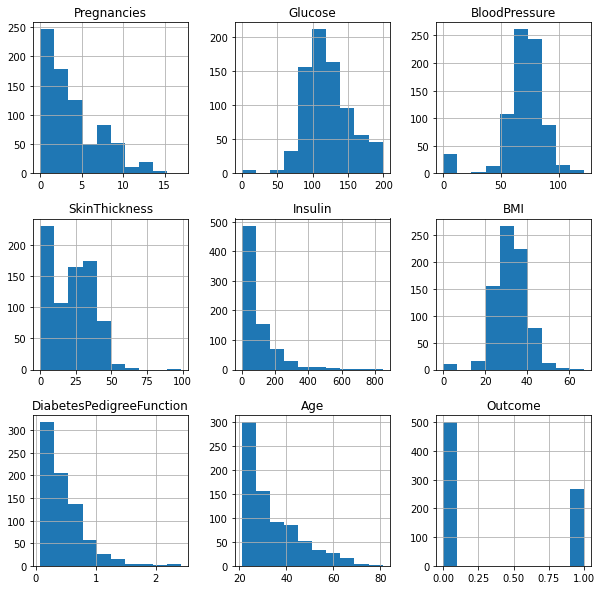

In [6]:
histRaw = dfDia.hist(figsize = (10,10))

We need to impute the data, i.e. to infer them from the known part of the data. For that purpose, first you have to replace zero values by NaN in the columns mencioned above.

In [7]:
dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']] = dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']].replace(0,np.NaN)

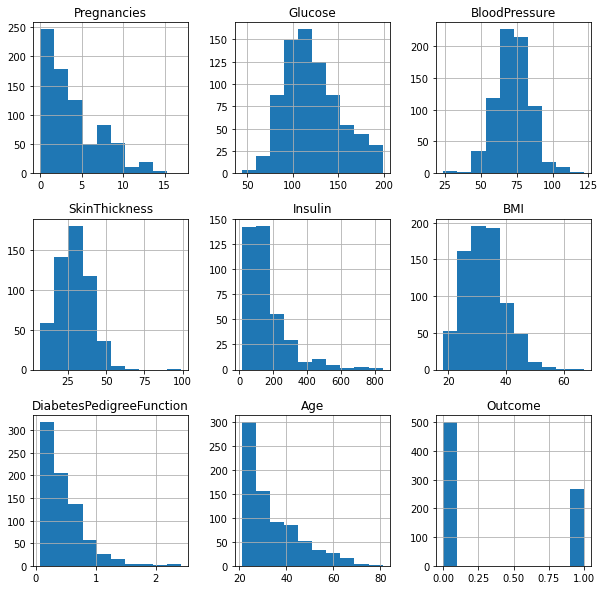

In [8]:
histNaN = dfDia.hist(figsize = (10,10))

## Mean Imputation

When the median value (50%) is similar to the mean, the distribution is symmetric.

In [9]:
dfDia[['SkinThickness','BMI','BloodPressure']].describe().loc[['mean','50%']]

,SkinThickness,BMI,BloodPressure
mean,29.15342,32.457464,72.405184
50%,29.00000,32.300000,72.000000


With this type of distribution, we use the mean in order to follow the central tendency of the data.

In [10]:
means = dfDia[['SkinThickness','BMI','BloodPressure']].mean()
dfDia[['SkinThickness','BMI','BloodPressure']] = dfDia[['SkinThickness','BMI','BloodPressure']].fillna(means)

Checking if NaNs values are completely filled.

In [11]:
dfDia[['SkinThickness','BMI','BloodPressure']].isnull().sum()

SkinThickness    0
BMI              0
BloodPressure    0
dtype: int64

When the mean is very different from the median, it is said to have a skewed distribution.

In [12]:
dfDia[['Glucose','Insulin']].describe().loc[['mean','50%']]

,Glucose,Insulin
mean,121.686763,155.548223
50%,117.000000,125.000000


Now we use the median to follow the central tendency.

In [13]:
medians = dfDia[['Glucose','Insulin']].median()
dfDia[['Glucose','Insulin']] = dfDia[['Glucose','Insulin']].fillna(medians)

## Final histograms

Now, the data is cleaned and imputed. We plot his histogram.

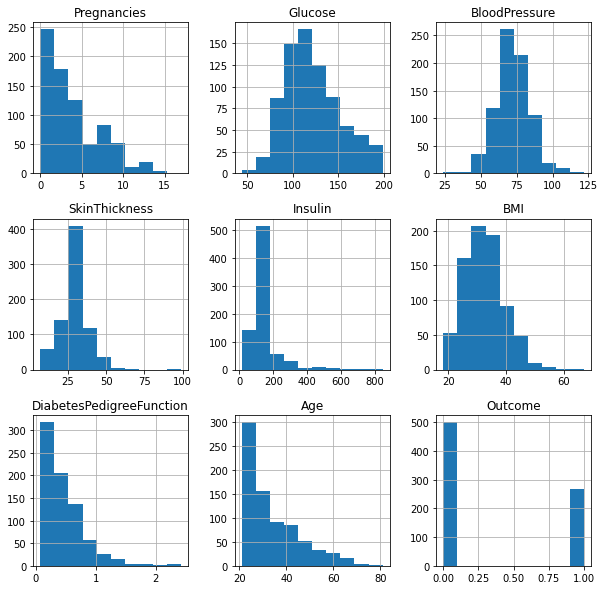

In [14]:
histClean = dfDia.hist(figsize = (10,10))

## Violin plots

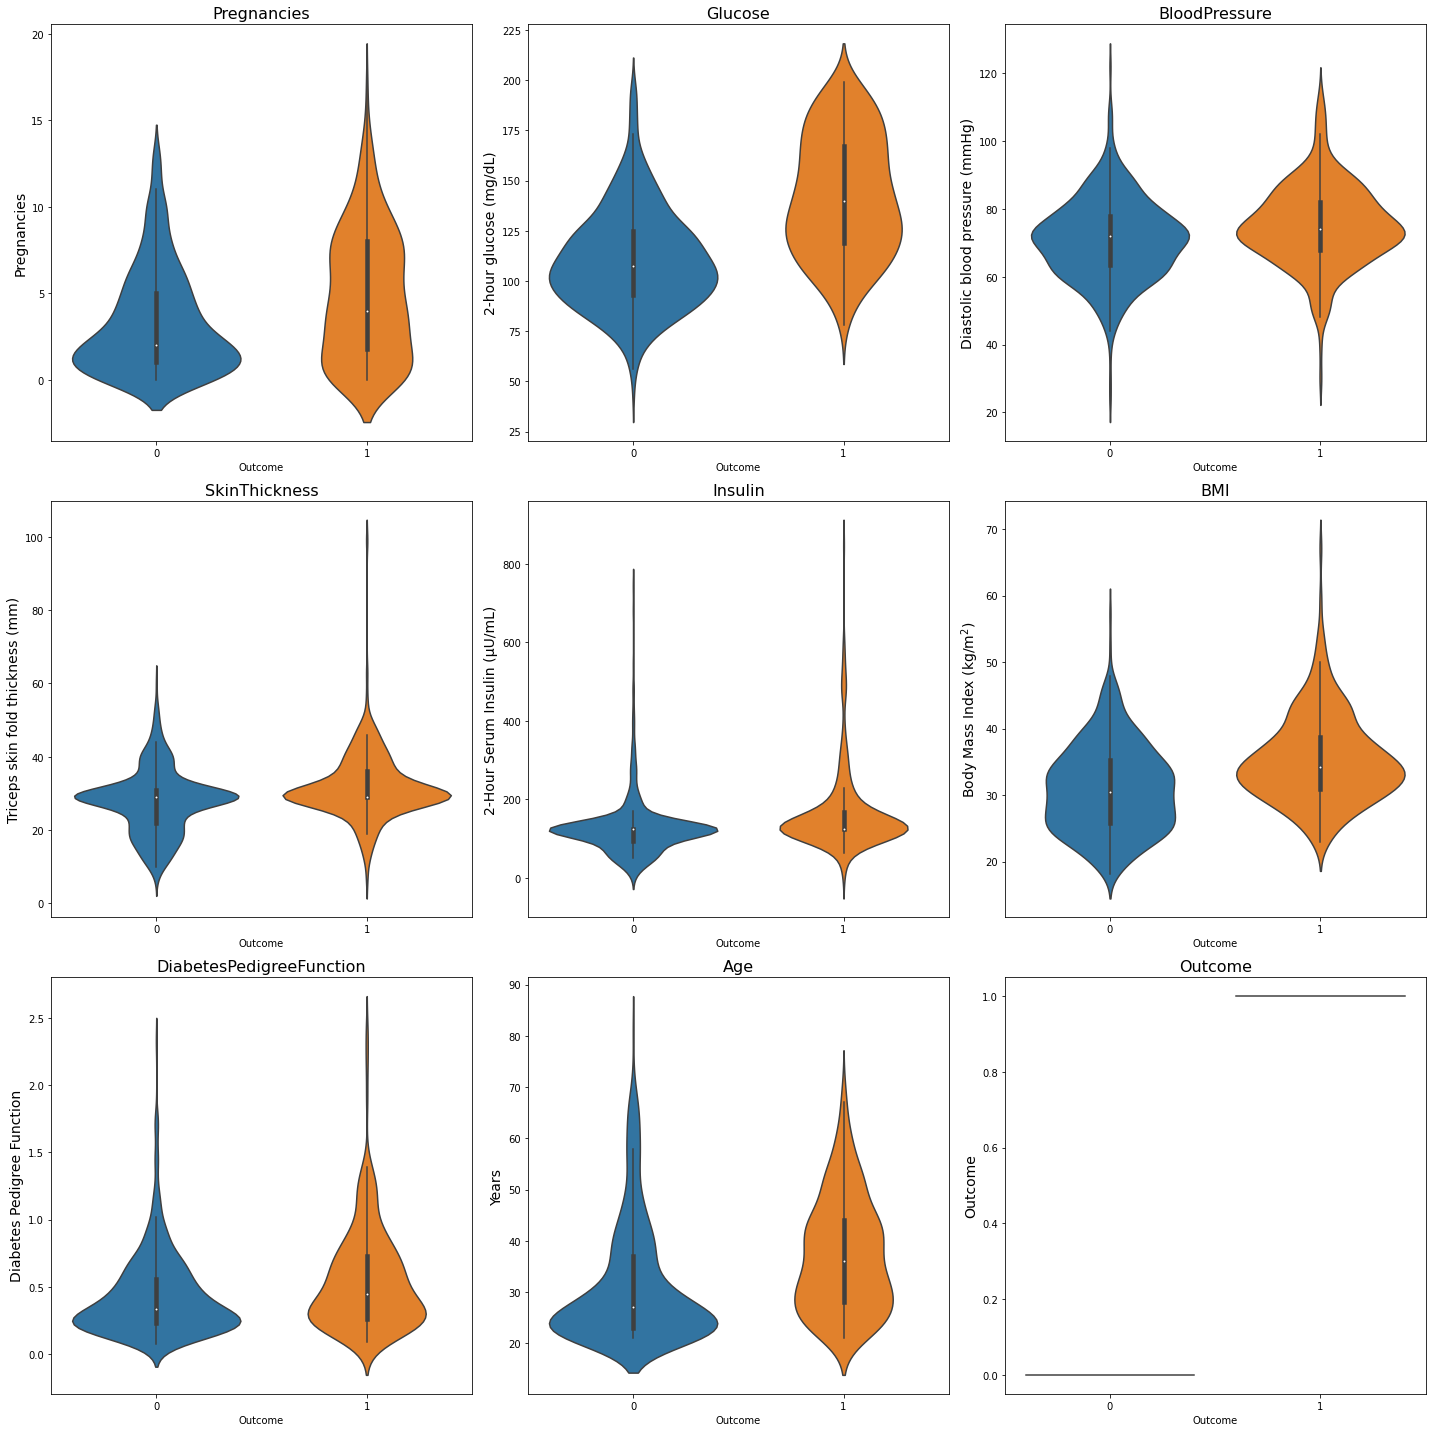

In [15]:
# Define the number of rows and columns for the subplots
nrows, ncols = 3, 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()
# axes = ["a","b","c","a","b","c","a","b","c"]

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfDia.columns):
    sns.violinplot(x="Outcome", y =col, data=dfDia, ax=axes[i])
    axes[0].set_ylabel('Pregnancies', fontsize=14)
    axes[1].set_ylabel('2-hour glucose (mg/dL)', fontsize=14)
    axes[2].set_ylabel('Diastolic blood pressure (mmHg)', fontsize=14)
    axes[3].set_ylabel('Triceps skin fold thickness (mm)', fontsize=14)
    axes[4].set_ylabel('2-Hour Serum Insulin (μU/mL)', fontsize=14)
    axes[5].set_ylabel('Body Mass Index (kg/m$^2$)', fontsize=14)
    axes[6].set_ylabel('Diabetes Pedigree Function', fontsize=14)
    axes[7].set_ylabel('Years', fontsize=14)
    axes[8].set_ylabel('Outcome', fontsize=14)
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfDia.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen the distributions in diabetic females have higher values than non diabetic ones. Specially in Glucose, Pregnancies, BMI and Age. It would not be surprising that these last variables are the ones with the greatest weight in Machine learning analyses. Although apart from this, we must take into account the correlations between variables.

## Data scaling

To ensure that the correlations are comparable, it is a good practice to scale the variables before calculating the correlation coefficients. This can help to avoid biases due to differences in the scaling of the variables, and it can also make the interpretation of the correlation coefficients easier.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDia.iloc[:,:-1] = scaler.fit_transform(dfDia.drop('Outcome', axis=1))

## Correlations

Searching correlation among the columns in the Dataframe using the ‘Spearman’ method.

<!-- Since there are no outliers or extreme values that are too far from the rest, Pearson's correlation was chosen instead of Spearman's. -->

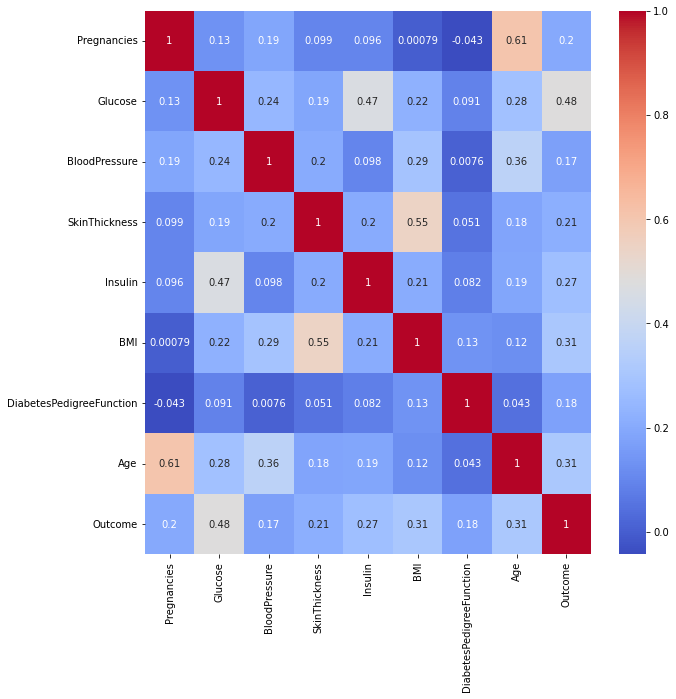

In [17]:
# Calculating correlation
corr_df = dfDia.corr(method ='spearman')
# Creating heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

# Showing heatmap
plt.show()

In [18]:
# stack() function converts the correlation matrix into a long format, 
#where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs = corr_df[corr_df > 0.25].stack().reset_index()
# Eliminating duplicates
corr_pairs = corr_pairs[corr_pairs['level_0'] < corr_pairs['level_1']]

# Formatting the output
corr_pairs = corr_pairs.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs = corr_pairs.sort_values(by='corr', ascending=False)
corr_pairs.reset_index(drop=True)

,col1,col2,corr
0,Age,Pregnancies,0.607216
1,BMI,SkinThickness,0.545106
2,Glucose,Outcome,0.481397
3,Glucose,Insulin,0.465800
4,Age,BloodPressure,0.363572
5,Age,Outcome,0.309040
6,BMI,Outcome,0.306577
7,BMI,BloodPressure,0.289747
8,Age,Glucose,0.281896
9,Insulin,Outcome,0.274427


Significant correlation values can be those greater than 0.25. Values with a direct correlation with the target variable "Outcome" are "Glucose" and "BMI", these variables are expected to have great weight in the Machine Learning prediction algorithms that will be used below. And "Insulin", "Age", "BloodPressure" and "SkinThickness" are variables that are indirectly correlated with the target variable, so they are also expected to have weight in the predictions, although to a lesser extent than the first mentioned.

Saving in a CSV.

In [19]:
import os
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

In [20]:
dfDia.to_csv("C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA\\datasets\\diabetes_meanImputation.csv",index=False)

# Algoritmos de Machine Learning:

Load dataset

In [21]:
dfDia = pd.read_csv("./datasets/diabetes_meanImputation.csv")

Train and test splitting

In [22]:
from sklearn.model_selection import train_test_split
# Splitting train and test 0.75/0.25
X = dfDia.drop('Outcome', axis=1)
y = dfDia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Decision tree

In [32]:
# Imports for decision tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from time import time

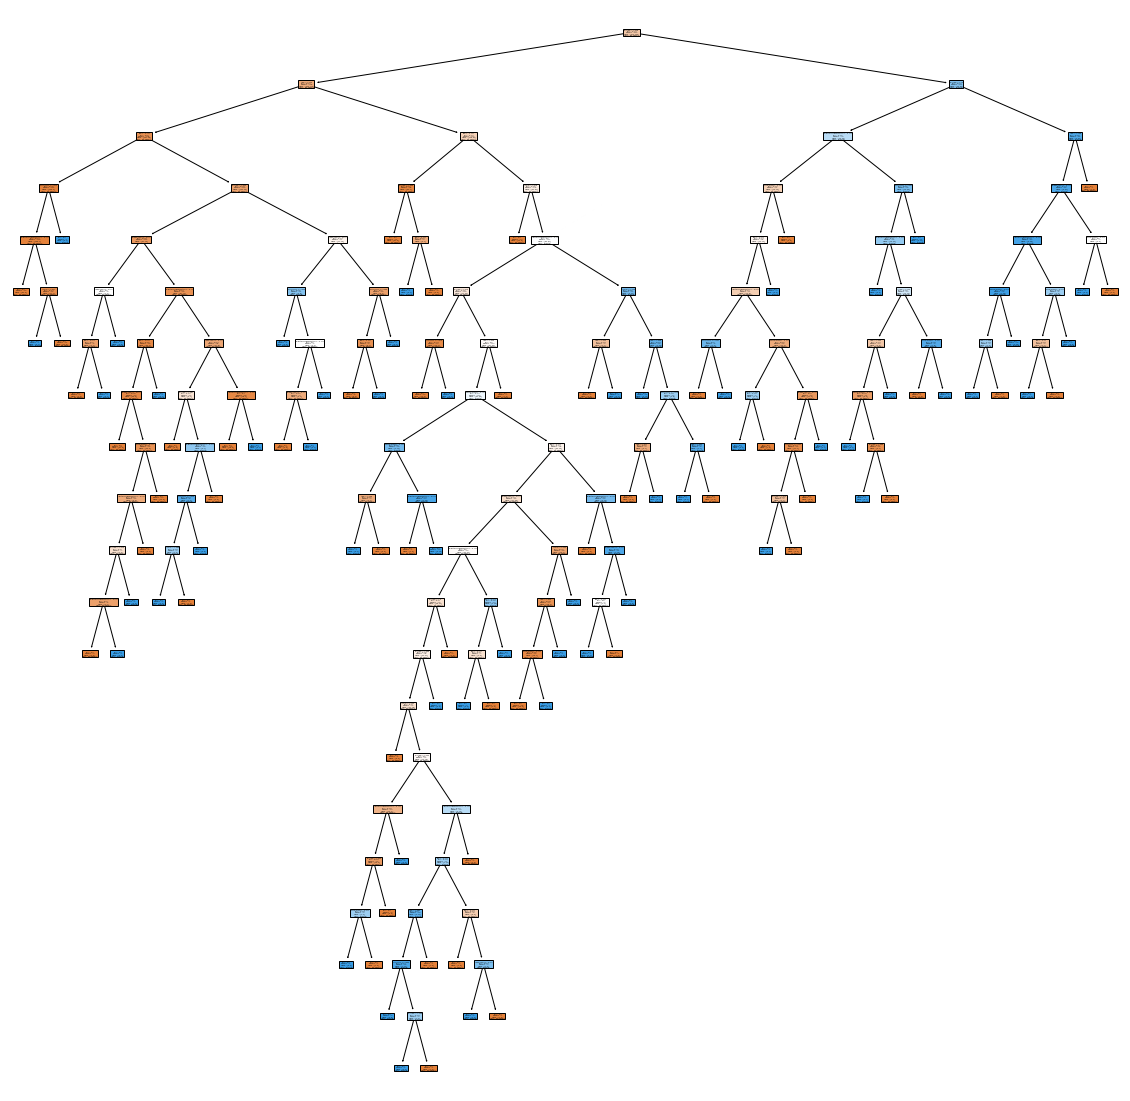

In [24]:
# Building a complete tree
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train,y_train)
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
# Plotting tree
plt.figure(figsize=(20,20))
features = dfDia.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

In [25]:
# Calculating train and test score (Overfitting)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 1.0
Test score: 0.7604166666666666


In [26]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],#, 9, 10
    'min_samples_split': [2, 3, 4], #2, 3, 4
     'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2']
}
clf_temp = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state=0)
grid_tree = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10)
grid_tree.fit(X_train,y_train)
clf_pruned_tree = grid_tree.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_tree.best_params_)

Fitting the classifier to the training set...
Elapsed time: 145.377s
Best estimator found by grid search:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


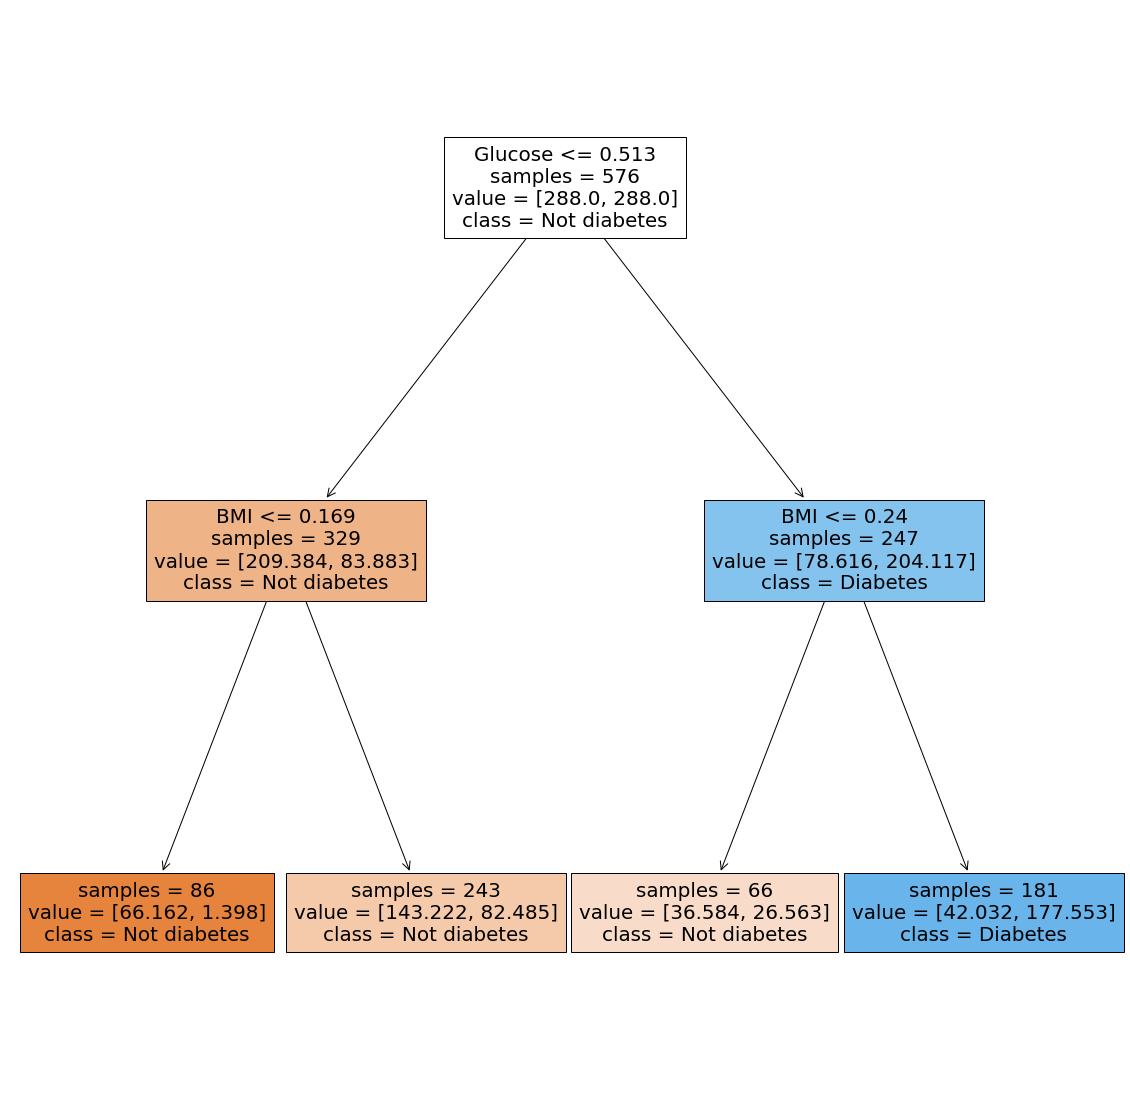

In [27]:
# Plotting pruned tree
plt.figure(figsize=(20,20))
features = dfDia.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_pruned_tree,feature_names=features, class_names=classes,filled=True, impurity=False)
plt.show()

In [28]:
#Fitting with the best parameters
clf_pruned_tree.fit(X_train,y_train)
#Predicting
y_train_pred = clf_pruned_tree.predict(X_train)
y_test_pred = clf_pruned_tree.predict(X_test)

print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.7690972222222222
Test score: 0.75


Train confusion matrix


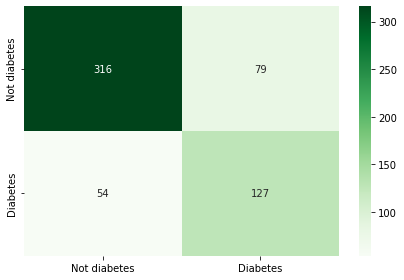

Test confusion matrix


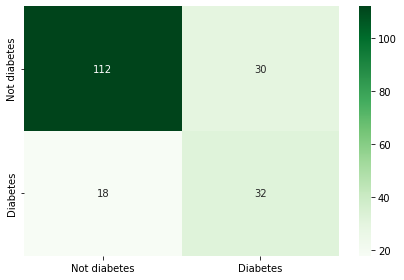

In [29]:
# Plotting confusion matrices
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(str(dom)+" confusion matrix")
    cf_tree = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf_tree,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Greens', fmt='g')
    plt.tight_layout()
    plt.show()
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [30]:
from sklearn.metrics import classification_report
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.80      0.85      0.83       370
    Diabetes       0.70      0.62      0.66       206

    accuracy                           0.77       576
   macro avg       0.75      0.74      0.74       576
weighted avg       0.76      0.77      0.77       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.79      0.86      0.82       130
    Diabetes       0.64      0.52      0.57        62

    accuracy                           0.75       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



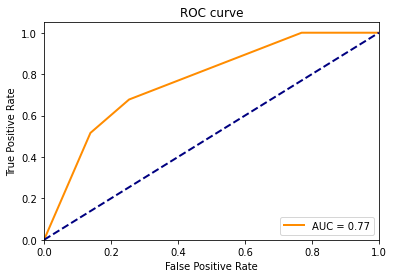

In [33]:
# Plot roc curves
def plot_roccurve(y_test,X_test,clf):
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=False, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roccurve(y_test,X_test,clf_pruned_tree)

## Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

In [35]:
# Training a Support Vector Machine (SVM)
t0 = time()
print("Fitting the classifier to the training set...")
param_grid={'C': [0.001,0.01,0.1, 1, 100,300,500],    #,700,900,1000#, 1, 1E2, 5E2       
            'degree': [0,1,2,3], #,1,2
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma' : ['scale','auto'] #[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
           }
clf_temp = SVC(class_weight='balanced', probability=True,random_state=0)
grid = GridSearchCV(estimator=clf_temp, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
clf_SVM = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 927.894s
Best estimator found by grid search:
{'C': 300, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


In [36]:
y_train_pred = clf_SVM.predict(X_train)
y_test_pred = clf_SVM.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.7899305555555556
Test score: 0.7760416666666666


Train confusion matrix


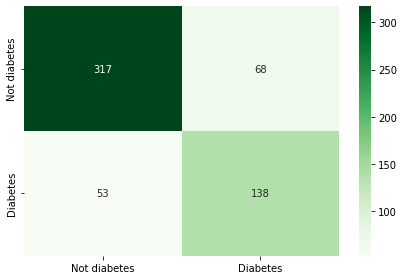

Test confusion matrix


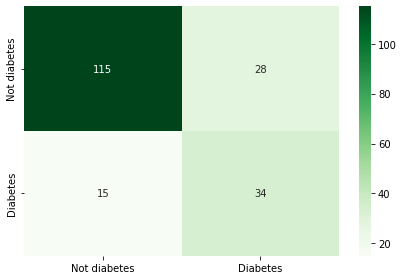

In [37]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [38]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.82      0.86      0.84       370
    Diabetes       0.72      0.67      0.70       206

    accuracy                           0.79       576
   macro avg       0.77      0.76      0.77       576
weighted avg       0.79      0.79      0.79       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.80      0.88      0.84       130
    Diabetes       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



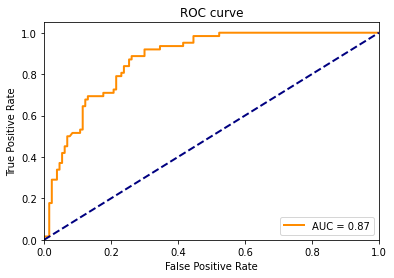

In [39]:
plot_roccurve(y_test,X_test,clf_SVM)

## k nearest neighbors (k-NN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Training k nearest neighbors (k-NN)
t0 = time()
print("Fitting the classifier to the training set...")
# If the dataset is small it is recommended small values of neighbours
param_grid = {'n_neighbors': [2,3,4,5], #6,7
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
clf_temp = KNeighborsClassifier()
grid = GridSearchCV(estimator = clf_temp, param_grid = param_grid, cv=10)
grid.fit(X_train, y_train)
clf_KNN = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 5.196s
Best estimator found by grid search:
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [42]:
y_train_pred = clf_KNN.predict(X_train)
y_test_pred = clf_KNN.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.828125
Test score: 0.7708333333333334


Train confusion matrix


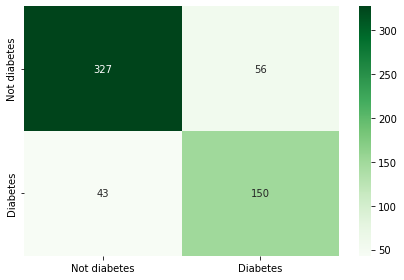

Test confusion matrix


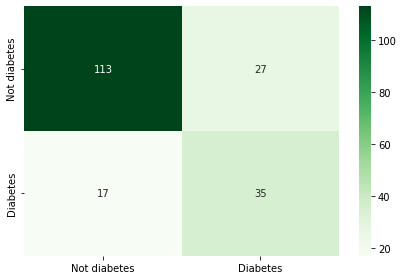

In [43]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [44]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.85      0.88      0.87       370
    Diabetes       0.78      0.73      0.75       206

    accuracy                           0.83       576
   macro avg       0.82      0.81      0.81       576
weighted avg       0.83      0.83      0.83       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.81      0.87      0.84       130
    Diabetes       0.67      0.56      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



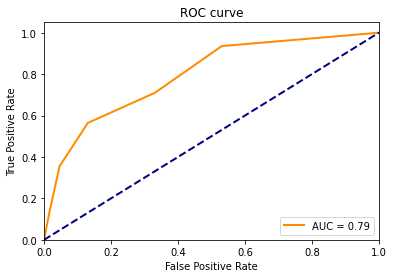

In [45]:
plot_roccurve(y_test,X_test,clf_KNN)